In [111]:
import numpy as np 
import pandas as pd
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import ShuffleSplit

In [112]:
df = pd.read_csv("D:/GUC/semester 10/Machine/assignments/payment_fraud.csv")

In [113]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [114]:
data = df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
target = df['isFraud']

In [115]:
data.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,9839.64,170136.0,160296.36,0.0,0.0
1,1864.28,21249.0,19384.72,0.0,0.0
2,181.00,181.0,0.00,0.0,0.0
3,181.00,181.0,0.00,21182.0,0.0
4,11668.14,41554.0,29885.86,0.0,0.0


In [116]:
from sklearn.model_selection import train_test_split
X, X_test, Y, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

In [117]:
Y.head()

1657090    0
3056545    0
224722     0
495935     0
4412383    0
Name: isFraud, dtype: int64

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [9]:
clf = linear_model.LogisticRegression(random_state=0).fit(X, Y)

In [10]:
y_predict = clf.predict(X)

In [11]:
def cost_function(y_pred,y):
    m = y.shape[0]
    return (1/(2*m))*np.sum((y_pred-y)**2)

In [12]:
print(metrics.confusion_matrix(Y,y_predict))

[[5083495      29]
 [   6086     486]]


In [13]:
print(clf.score(X,Y))

0.9987986474125439


In [14]:
def test_hypothesis(X,y):
    X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=0)
    cost_cv = []
    cost_train = []
    reg2 = linear_model.LogisticRegression(random_state=0).fit(X_train, y_train)
    y_predCV = reg2.predict(X_cv)
    y_pred_train=reg2.predict(X_train)
    cost_cv.append(cost_function(y_predCV,y_cv))
    cost_train.append(cost_function(y_pred_train,y_train))
            

    return cost_cv, cost_train

In [15]:
cost_cv = []
cost_train = []
for i in range(4):
    x_h = X[:,0:i+2]
    c,t = test_hypothesis(x_h,Y)
    cost_cv.append(c)
    cost_train.append(t)



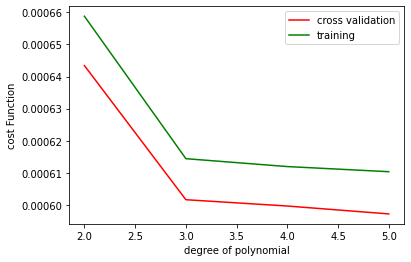

In [16]:
plt.figure()
x_axis = [2,3,4,5]
plt.plot(x_axis,cost_cv,'r')
plt.plot(x_axis,cost_train,'g')
plt.ylabel(f'cost Function')

plt.xlabel('degree of polynomial')
plt.legend(['cross validation','training'],loc='upper right')



In [17]:
reg2 = linear_model.LogisticRegression(random_state=0).fit(X[:,0:4], Y)
y_pred = reg2.predict(X_test[:,0:4])

print(f'Generaliztion error fot test set is {cost_function(y_pred,y_test)}')

Generaliztion error fot test set is 0.0005999886839069441


In [18]:
print(f'Accuracy score for the test set is : {clf.score(X_test,y_test)}')

Accuracy score for the test set is : 0.9988078810301416


## Another Method

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
from sklearn.model_selection import train_test_split
X, X_test, Y, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

In [21]:
cv_errs = []
t_errs = []
degree = [1,2]
for i in degree:
    logistic_regression = make_pipeline(PolynomialFeatures(degree=i), MinMaxScaler(),
                                  LogisticRegression())
    cv = ShuffleSplit(n_splits=5, random_state=1)
    cv_results = cross_validate(logistic_regression, X, Y,
                            cv=cv, scoring="neg_mean_squared_log_error",
                            return_train_score=True,
                            return_estimator=True, n_jobs=2)
    train_error = (-cv_results["train_score"])
    test_error = (-cv_results["test_score"])
    print(f'Plonomial of degree {i}')
    print(f"Mean squared error of logistc regression model on the train set:\n"
        f"{train_error.mean():.3f} +/- {train_error.std():.3f}")
    print(f"Mean squared error of logistic regression model on the test set:\n"
        f"{test_error.mean():.3f} +/- {test_error.std():.3f}")
    cv_errs.append(test_error.mean())
    t_errs.append(train_error.mean())

Plonomial of degree 1
Mean squared error of logistc regression model on the train set:
0.001 +/- 0.000
Mean squared error of logistic regression model on the test set:
0.001 +/- 0.000
Plonomial of degree 2
Mean squared error of logistc regression model on the train set:
0.001 +/- 0.000
Mean squared error of logistic regression model on the test set:
0.001 +/- 0.000


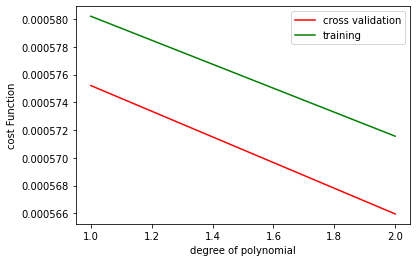

In [22]:
plt.figure()
plt.plot(degree,cv_errs,'r')
plt.plot(degree,t_errs,'g')
plt.ylabel(f'cost Function')
plt.xlabel('degree of polynomial')
plt.legend(['cross validation','training'],loc='upper right')

## K-fold sampling

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
X = scaler.transform(data)

In [20]:
target

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [21]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(data)
accuracy_scores = []
for train_index, test_index in kf.split(data):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index],X[test_index]
    y_train, y_test = target[train_index], target[test_index]
    reg2 = linear_model.LogisticRegression(random_state=0).fit(X_train[:,0:4], y_train)
    y_pred = reg2.predict(X_test[:,0:4])
    print( metrics.confusion_matrix(y_test,y_pred))
    accuracy_scores.append(reg2.score(X_test[:,0:4],y_test))

TRAIN: [ 636262  636263  636264 ... 6362617 6362618 6362619] TEST: [     0      1      2 ... 636259 636260 636261]
[[635879      0]
 [   371     12]]
TRAIN: [      0       1       2 ... 6362617 6362618 6362619] TEST: [ 636262  636263  636264 ... 1272521 1272522 1272523]
[[635105      0]
 [  1090     67]]
TRAIN: [      0       1       2 ... 6362617 6362618 6362619] TEST: [1272524 1272525 1272526 ... 1908783 1908784 1908785]
[[635910      0]
 [   326     26]]
TRAIN: [      0       1       2 ... 6362617 6362618 6362619] TEST: [1908786 1908787 1908788 ... 2545045 2545046 2545047]
[[635856      0]
 [   376     30]]
TRAIN: [      0       1       2 ... 6362617 6362618 6362619] TEST: [2545048 2545049 2545050 ... 3181307 3181308 3181309]
[[635861      0]
 [   372     29]]
TRAIN: [      0       1       2 ... 6362617 6362618 6362619] TEST: [3181310 3181311 3181312 ... 3817569 3817570 3817571]
[[635762     10]
 [   452     38]]
TRAIN: [      0       1       2 ... 6362617 6362618 6362619] TEST: [38

Text(0.5, 0, 'iterations')

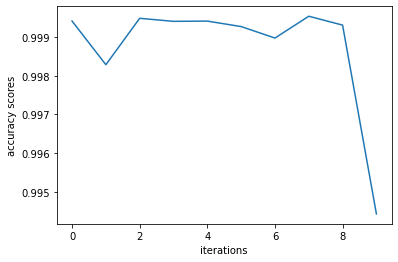

In [22]:
plt.figure()
plt.plot(accuracy_scores)
plt.ylabel('accuracy scores')
plt.xlabel('iterations')

## Stratified Sampling

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=47)
sss.get_n_splits(X, target)
accuracy_scores = []
for train_index, test_index in sss.split(X, target):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = target[train_index], target[test_index]
    reg2 = linear_model.LogisticRegression(random_state=0).fit(X_train[:,0:4], y_train)
    y_pred = reg2.predict(X_test[:,0:4])
    print( metrics.confusion_matrix(y_test,y_pred))
    accuracy_scores.append(reg2.score(X_test[:,0:4],y_test))

TRAIN: [5073752 4511398 6107067 ... 2333082 4449398 2286529] TEST: [4086879  700743 1070103 ... 5590843 2214645 4782968]
[[1270877       4]
 [   1544      99]]
TRAIN: [  31367 1726477 2360228 ... 3721211   80728 4158389] TEST: [5916636 5851259 1568690 ... 5989257 3108527 3301531]
[[1270873       8]
 [   1507     136]]
TRAIN: [3289324 1667476 5186218 ... 1690675 1226860 1673812] TEST: [1364046 4858747 1936126 ... 1034845  154878 2257230]
[[1270872       9]
 [   1534     109]]
TRAIN: [2292812 6221057 1941269 ... 2559951 1209267 4447556] TEST: [2030475 3291093 1874518 ...  379913 2681312 6140964]
[[1270873       8]
 [   1523     120]]
TRAIN: [1320133 4020254  754281 ...  446588 5115130 1615138] TEST: [3657326 3792019 3099258 ...  461751 5550011 1821373]
[[1270875       6]
 [   1524     119]]


Text(0.5, 0, 'iterations')

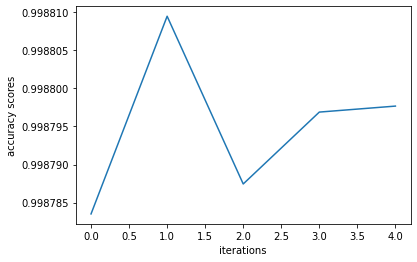

In [24]:
plt.figure()
plt.plot(accuracy_scores)
plt.ylabel('accuracy scores')
plt.xlabel('iterations')

## Regularization

In [161]:
from sklearn.linear_model import LogisticRegressionCV

In [164]:
from sklearn.model_selection import train_test_split
X, X_test, Y, y_test = train_test_split(data, target, test_size=0.2, random_state=0)
clf = LogisticRegressionCV(cv=10, penalty='l2', random_state=0).fit(X, Y)

In [170]:
clf.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [177]:
clf.scores_[1]

array([[0.99782126, 0.99782126, 0.99782126, 0.99782126, 0.99782126,
        0.99782126, 0.99782126, 0.99782126, 0.99782126, 0.99782126],
       [0.99795485, 0.99795485, 0.99795485, 0.99795485, 0.99795485,
        0.99795485, 0.99795485, 0.99795485, 0.99795485, 0.99795485],
       [0.99779572, 0.99779572, 0.99779572, 0.99779572, 0.99779572,
        0.99779572, 0.99779572, 0.99779572, 0.99779572, 0.99779572],
       [0.99773482, 0.99773482, 0.99773482, 0.99773482, 0.99773482,
        0.99773482, 0.99773482, 0.99773482, 0.99773482, 0.99773482],
       [0.99787431, 0.99787431, 0.99787431, 0.99787431, 0.99787431,
        0.99787431, 0.99787431, 0.99787431, 0.99787431, 0.99787431],
       [0.99784484, 0.99784484, 0.99784484, 0.99784484, 0.99784484,
        0.99784484, 0.99784484, 0.99784484, 0.99784484, 0.99784484],
       [0.99751478, 0.99751478, 0.99751478, 0.99751478, 0.99751478,
        0.99751478, 0.99751478, 0.99751478, 0.99751478, 0.99751478],
       [0.99794699, 0.99794699, 0.9979469

In [172]:
clf.C_

array([0.0001])

Text(0.5, 0, 'Regulaziation parameter')

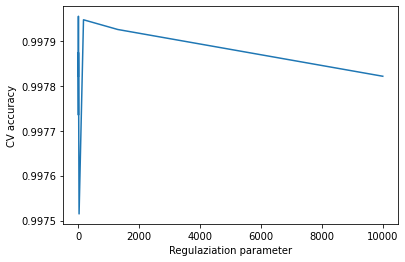

In [180]:
scores = (np.array(clf.scores_[1])).mean(axis=1)
plt.plot(clf.Cs_,scores)
plt.ylabel("CV accuracy")
plt.xlabel('Regulaziation parameter')

In [181]:
y_pred = clf.predict(X_test)

In [183]:
print( metrics.confusion_matrix(y_test,y_pred))

[[1268381    2502]
 [    343    1298]]


In [184]:
print(clf.score(X_test,y_test))

0.9977642857816434


## another regularization method

In [120]:
from sklearn.linear_model import RidgeClassifierCV

alphas = np.logspace(-2, 0, num=20)
ridge = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),
                      RidgeClassifierCV(alphas=alphas, store_cv_values=True))
cv = ShuffleSplit(n_splits=5, random_state=1)
cv_results = cross_validate(ridge, X, Y,cv=cv, scoring="neg_mean_squared_log_error",
                            return_train_score=True,
                            return_estimator=True, n_jobs=2)

In [127]:
alphas.shape

(20,)

In [128]:
cv_results["estimator"][0][-1].cv_values_.mean(axis=0)

array([[0.00408181, 0.00408181, 0.00408181, 0.00408181, 0.00408183,
        0.00408186, 0.00408192, 0.00408203, 0.00408222, 0.00408252,
        0.00408301, 0.00408375, 0.00408488, 0.00408653, 0.00408888,
        0.0040921 , 0.00409636, 0.00410177, 0.00410837, 0.00411605]])

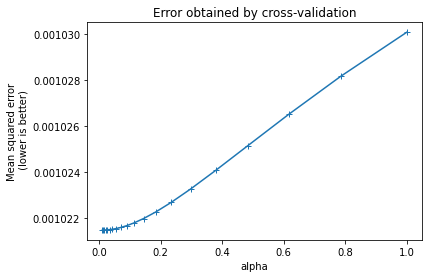

In [129]:
cv_alphas.mean(axis=0).plot(marker="+")
plt.ylabel("Mean squared error\n (lower is better)")
plt.xlabel("alpha")
_ = plt.title("Error obtained by cross-validation")

In [130]:
best_alphas = [est[-1].alpha_ for est in cv_results["estimator"]]
best_alphas

[0.012742749857031334,
 0.012742749857031334,
 0.012742749857031334,
 0.012742749857031334,
 0.012742749857031334]

In [131]:
print(f"The mean optimal alpha leading to the best generalization performance is:\n"
      f"{np.mean(best_alphas):.2f} +/- {np.std(best_alphas):.2f}")

The mean optimal alpha leading to the best generalization performance is:
0.01 +/- 0.00


In [132]:
data.shape

(6362620, 5)

In [133]:
from sklearn.linear_model import RidgeClassifier

In [154]:

ridge = make_pipeline(PolynomialFeatures(degree=1), MinMaxScaler(),
                      RidgeClassifier(alpha=0.01))
cv_results = cross_validate(ridge, X, Y,
                            cv=10, scoring="neg_mean_squared_log_error",
                            return_train_score=True,
                            return_estimator=True)
train_error = -cv_results["train_score"]
print(f"Mean squared error of logistic regression model on the train set:\n"
      f"{train_error.mean():.3f} +/- {train_error.std():.3f}")
test_error = -cv_results["test_score"]
print(f"Mean squared error of logistic regression model on the test set:\n"
      f"{test_error.mean():.3f} +/- {test_error.std():.3f}")
                        

Mean squared error of logistic regression model on the train set:
0.001 +/- 0.000
Mean squared error of logistic regression model on the test set:
0.001 +/- 0.000


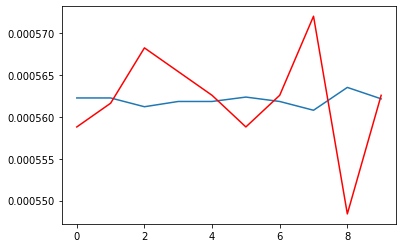

In [155]:
plt.plot(train_error)
plt.plot(test_error,'r')

In [156]:
clf = cv_results["estimator"][5][-1]

In [157]:
m,n = X_test.shape
x_tmp = np.ones((m,1))
x_tmp = np.append(x_tmp,np.array(X_test),axis=1)
x_tmp

array([[1.00000000e+00, 6.07193640e+05, 1.54586493e+07, 1.60658429e+07,
        3.39453770e+06, 2.78734406e+06],
       [1.00000000e+00, 3.47375000e+03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.61706900e+04, 3.28030000e+04, 0.00000000e+00,
        0.00000000e+00, 6.61706900e+04],
       ...,
       [1.00000000e+00, 1.30962400e+04, 5.63800000e+03, 0.00000000e+00,
        0.00000000e+00, 1.30962400e+04],
       [1.00000000e+00, 9.68149200e+04, 0.00000000e+00, 0.00000000e+00,
        1.60732985e+06, 1.70414476e+06],
       [1.00000000e+00, 8.02870090e+05, 0.00000000e+00, 0.00000000e+00,
        3.34715375e+06, 4.15002384e+06]])

In [158]:
pred = clf.predict(x_tmp)
pred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [159]:
print( metrics.confusion_matrix(y_test,pred))

[[687762 583121]
 [    32   1609]]


In [160]:
clf.score(x_tmp,y_test)

0.5417351657021793